In [1]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy.utils.data import download_file

In [3]:
from astropy.io import fits
from astropy import wcs
import sys
import os
import glob
import cv2
import gzip

In [4]:
image_name = '01_03NOV21_S21112_0004_cutout_0407.fits'
#folder_name = 'im332p64277_-22p66323_0p1_231335147657'
folder_name = 'im332p64277_-22p66323_0p1_231053769721'
#image_path = '/home/oem/Documentos/Astronomy/CRTS/im332p64277_-22p66323_0p1_231335147657/' + image_name
image_path = '/home/oem/Documentos/Astronomy/CRTS/'
all_images = glob.glob( image_path + folder_name +'/*.fits') 
print(all_images[1])


/home/oem/Documentos/Astronomy/CRTS/im332p64277_-22p66323_0p1_231053769721/01_12NOV07_S23110_0002_cutout_3332.fits


In [5]:
image_name = '01_03NOV21_S21112_0004_cutout_0407.fits'
folder_name = 'im332p64277_-22p66323_0p1_231335147657'
#image_path = '/home/oem/Documentos/Astronomy/CRTS/im332p64277_-22p66323_0p1_231335147657/' + image_name
image_path = '/home/oem/Documentos/Astronomy/CRTS/'
all_images = glob.glob( image_path + folder_name +'/*.fits') 
all_images.sort
print('Number of fits images for one object:',len(all_images))
hdu_list = fits.open(all_images[0])
#hdu_list = fits.open(image_path + folder_name + '/' + image_name)
hdu_list.info()
#hdu_list.header
image_data = hdu_list[0].data
#convert from WC to pixel coordinate
#RA/DEC from the table in the web page 
#RA = 332.667502722
#DEC = -22.6571085044

RA = 332.636506808 # crds centradas: con estas coordenadas dan valores que tienen sentido en terminos de crds pixel
DEC = -22.6281009862

w = wcs.WCS(hdu_list[0].header)
print(w.get_axis_types)
#print(w.wcs.radesys) #FK5 que quiere decir esto
#extract RA/DEC coordinates from metadata
ra_dec_crd = w.wcs.crval #con estas crds dan numeros mas grandes que el tamaño de la imagen 
print('RA/DEC coordinates from metadata:', ra_dec_crd)
print('RA/DEC coordinates from table:', RA, DEC)
#w.wcs.print_contents()
#worldcrd = np.array([[ra_dec_crd[0] ,ra_dec_crd[1]]]) #shape = (1,2)
worldcrd = np.array([[RA ,DEC]]) 
pixcrd = w.wcs_world2pix(worldcrd, 1) #1 is for the origin in FITS ims
print('Pixel coordinates:',pixcrd)

Number of fits images for one object: 98
Filename: /home/oem/Documentos/Astronomy/CRTS/im332p64277_-22p66323_0p1_231335147657/02_09SEP24_S23110_0001_cutout_3133.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      98   (120, 136)   int16 (rescales to uint16)   
<bound method WCS.get_axis_types of WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 333.92759509000001  -23.995028005000002  
CRPIX : -1664.5  -1911.5  
CD1_1 CD1_2  : -0.00069506752200000003  -3.71538e-07  
CD2_1 CD2_2  : -3.7133300000000001e-07  0.000695451118  
NAXIS : 120  136>
RA/DEC coordinates from metadata: [ 333.92759509  -23.99502801]
RA/DEC coordinates from table: 332.636506808 -22.6281009862
Pixel coordinates: [[ 49.67600257  47.88027001]]


CO1_2   =-0.000695057774896105                                                   [astropy.io.fits.card]
CO1_3   =-4.35085722047957E-07                                                   [astropy.io.fits.card]
CO1_6   =-3.85464689376223E-11                                                   [astropy.io.fits.card]
CO2_1   =-0.000107576489240282                                                   [astropy.io.fits.card]
CO2_2   =-2.97873497034787E-07                                                   [astropy.io.fits.card]
CO2_6   =-3.72194771429584E-12                                                   [astropy.io.fits.card]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [6]:
print(type(image_data))
print(image_data.shape)
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

<class 'numpy.ndarray'>
(136, 120)
Min: 3317
Max: 15989
Mean: 3462.71568627
Stdev: 225.380050592


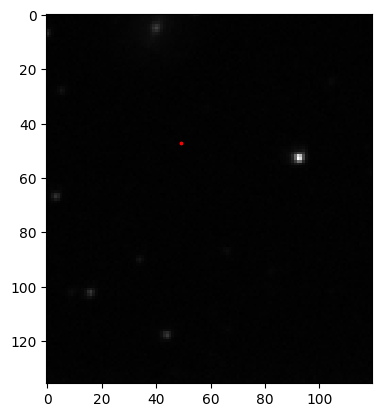

In [7]:
#visualization
plt.imshow(image_data, cmap='gray')
plt.scatter(int(pixcrd[0,0]), int(pixcrd[0,1]),color='r',s=3)
#cv2.circle(image_data, (int(pixcrd[0,0]),int(pixcrd[0,1])), 5, (0,0,0), -1)
#plt.colorbar()

In [8]:
#histogram
#plt.hist(image_data, bins=256, range=(0.0, 1.0), fc='k', ec='k')

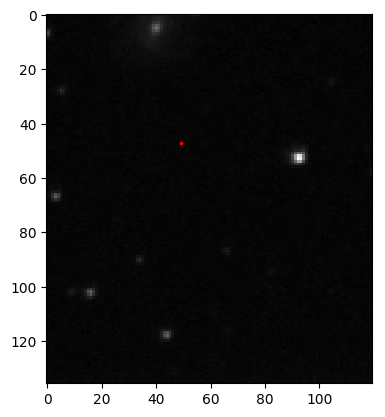

In [8]:
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap='gray', norm=LogNorm())
plt.scatter(int(pixcrd[0,0]), int(pixcrd[0,1]),color='r',s=3)
# I chose the tick marks based on the histogram above
#cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
#cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

## Visualize all the images of one object

In [13]:

list_of_ims = []
for file_name in all_images:
    hdu_list = fits.open(file_name)
    image_data = hdu_list[0].data
    #extract crds from metadata
    w = wcs.WCS(hdu_list[0].header)
    ra_dec_crd = w.wcs.crval
    worldcrd = np.array([[ra_dec_crd[0] ,ra_dec_crd[1]]])
    pixcrd = w.wcs_world2pix(worldcrd, 1) 
    #print(np.shape(image_data))
    list_of_ims.append(image_data)

    #plt.close()


CO1_2   =-0.000695057774896105                                                   [astropy.io.fits.card]
CO1_3   =-4.35085722047957E-07                                                   [astropy.io.fits.card]
CO1_6   =-3.85464689376223E-11                                                   [astropy.io.fits.card]
CO2_1   =-0.000107576489240282                                                   [astropy.io.fits.card]
CO2_2   =-2.97873497034787E-07                                                   [astropy.io.fits.card]
CO2_6   =-3.72194771429584E-12                                                   [astropy.io.fits.card]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
CO1_1   =-1.15518187612511E-05                                                   [astropy.io.fits.card]
CO1_2   =-0.000695043411432016                                                   [astropy.io.fits.card]
CO1_3   =-1.28220458652598E-06                                                   [astropy.io.fits.ca

In [14]:
import matplotlib.animation as animation
fig = plt.figure()
ims = []
plt.ion()
for elem in list_of_ims:
    #plt.figure()
    #fig.add_subplot(111, projection=wcs)
    plt.imshow(elem, cmap='gray',origin='lower', norm=LogNorm())
    plt.scatter(int(pixcrd[0,0]), int(pixcrd[0,1]),color='r',s=3)
    #plt.pause(0.2)
    plt.show()
plt.ioff()


AttributeError: 'Figure' object has no attribute 'imshow'